# Import Libraries

In [5]:
from read_data import combine_all, combine_category, read_data

In [6]:
import pandas as pd    
import numpy as np    
import seaborn as sns
import os
from stop_words import get_stop_words

In [7]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [8]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

# Scrapped Data

In [9]:
df=combine_all()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101345 entries, 0 to 60532
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   Name         1101261 non-null  object
 1   Comment      1101078 non-null  object
 2   Time         1101345 non-null  object
 3   Likes        1101345 non-null  int64 
 4   Reply Count  1101345 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 50.4+ MB


# Cleaning Comments from the data

In [11]:
df["Comment"]=df["Comment"].astype(str)

In [12]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# Download NLTK Modules

In [13]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/srijanmalhotra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/srijanmalhotra/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/srijanmalhotra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/srijanmalhotra/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/srijanmalhotra/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Performing Sentiment Analysis

In [14]:
df["Comment"] = df["Comment"].apply(lambda x: clean_text(x))

In [15]:
sentid = SentimentIntensityAnalyzer()
df["sentiments"] = df["Comment"].apply(lambda x:sentid.polarity_scores(x))
df = pd.concat([df.drop(["sentiments"],axis=1),df["sentiments"].apply(pd.Series)],axis=1)
df

,Name,Comment,Time,Likes,Reply Count,neg,neu,pos,compound
0,MrBeast,like say video subscribe haven’t already could...,2021-03-27T23:31:32Z,260829,419,0.000,0.488,0.512,0.7430
1,Alisha Gouker,look scary,2022-04-02T23:34:40Z,0,0,0.762,0.238,0.000,-0.4939
2,Lea Wodi,work breathe mean time air go,2022-04-02T23:20:34Z,0,0,0.000,1.000,0.000,0.0000
3,Alex gamer,oxygen,2022-04-02T21:19:16Z,0,0,0.000,1.000,0.000,0.0000
4,Deedee Brown,oh know could,2022-04-02T20:43:11Z,0,0,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...
60528,Poke ax,wow,2021-04-07T18:45:37Z,11,9,0.000,0.000,1.000,0.5859
60529,Friday game week,first,2021-04-07T18:45:37Z,7,26,0.000,1.000,0.000,0.0000
60530,Zaptix,first,2021-04-07T18:45:36Z,16,14,0.000,1.000,0.000,0.0000
60531,ROTNOX,first,2021-04-07T18:45:36Z,10,11,0.000,1.000,0.000,0.0000


In [18]:
df.to_csv('vader.csv')

# Visualisations

In [23]:
df[['neg', 'neu', 'pos']].apply(lambda x: np.argmax(x))

neg    116
neu      2
pos     59
dtype: int64

/opt/anaconda3/envs/mmds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neg', ylabel='count'>

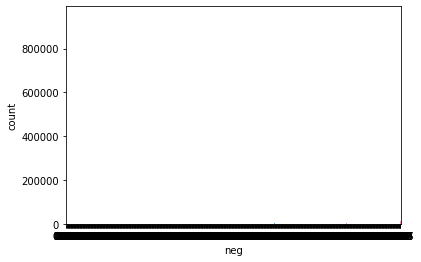

In [17]:
sns.countplot('neg', data=df)